# Carbon Reservoir Model

In [1]:
%pylab inline

# Import libraries
from ipywidgets import widgets, IntSlider, Label
from IPython.display import display

from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


In [57]:
def plot_models(t, solution):
    plt.rc('text', usetex=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1,figsize=(14,18), sharex=False)
    
    ax1.plot(t, solution[:,0], label='Atmosphere')
    ax1.plot(t, solution[:,1], label='Continental Crust')
    ax1.plot(t, solution[:,2], label='Mantle')
    
    ax1.set_xlabel(r't (Gyr)', fontsize='xx-large')
    ax1.set_ylabel(r'$^cM \times 10^8$ Gt', fontsize='xx-large')
    ax1.set_yticklabels([0.0, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5], fontsize='xx-large')
    for label in ax1.get_xticklabels()[1::2]:
        label.set_visible(False)
    for label in ax1.get_xticklabels()[::2]:
        label.set_fontsize('xx-large')   
    ax1.legend(loc='center left', ncol=1, fancybox=True, shadow=True, fontsize='xx-large')

    ax2.plot(t, solution[:,0], label='Atmosphere')
    ax2.set_xlabel(r't (Gyr)', fontsize='xx-large')
    ax2.set_ylabel(r'$^cM$ Gt', fontsize='xx-large')
    for label in ax2.get_xticklabels()[::2]:
        label.set_visible(False)
    for label in ax2.get_xticklabels()[1::2]:
        label.set_fontsize('xx-large')
    for label in ax2.get_yticklabels()[::2]:
        label.set_visible(False)
    for label in ax2.get_yticklabels()[1::2]:
        label.set_fontsize('xx-large')    
    ax2.set_xlim([0.5,4.4])
    ax2.set_ylim([0,8000])
    ax2.legend(loc='center right', ncol=1, fancybox=True, shadow=True, fontsize='xx-large')
    
    ax3.plot(t, solution[:,0], label='Atmosphere')
    ax3.set_xlabel(r't $+ \,0.5$ Gyr', fontsize='xx-large')
    ax3.set_xticklabels([0, '25,000', '50,000', '75,000', '100,000', '125,000', '150,000', '175,000', '200,000'], fontsize='xx-large')
    ax3.set_ylabel(r'$^cM$ Gt', fontsize='xx-large')
    for label in ax3.get_xticklabels()[1::2]:
        label.set_visible(False)
    for label in ax3.get_yticklabels()[::2]:
        label.set_visible(False)
    for label in ax3.get_yticklabels()[1::2]:
        label.set_fontsize('xx-large')    
    ax3.legend(loc='center right', ncol=1, fancybox=True, shadow=True, fontsize='xx-large')
    ax3.set_xlim([0.5,0.502])
    ax3.set_ylim([0,8000])

    savefig('DCO-Carbon-Reservoir-Model-M-CC.png')
    plt.show()

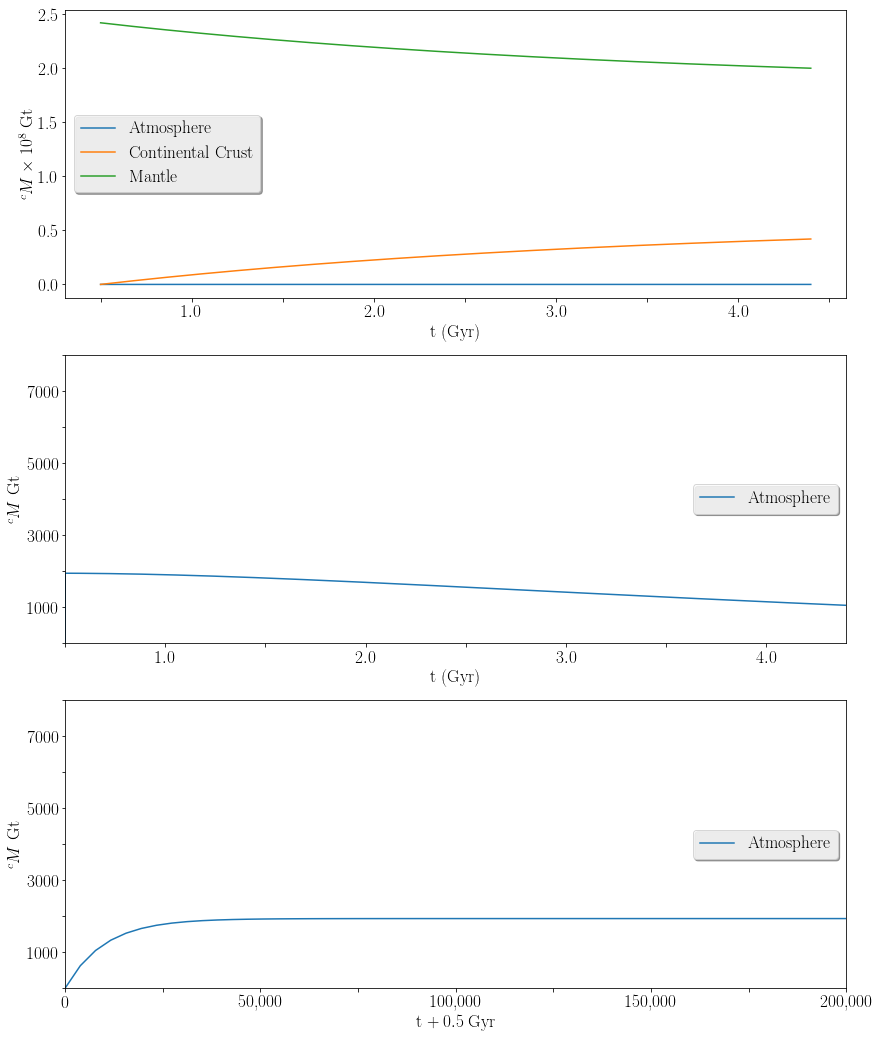

In [59]:
def g(y, t, params):
    cMa, cMcc, cMm = y
    t_1, t_p, tf, tau_1, cMmp, cFmap, cMccp, cFccap = params

    derivs = [(cMm/cMmp)*cFmap*exp((t_p - t)/tf) - cMa/tau_1 + (cMcc/cMccp)*cFccap*exp((t_p - t)/tf),
              cMa/tau_1 - (cMcc/cMccp)*cFccap*exp((t_p - t)/tf),
              -(cMm/cMmp)*cFmap*exp((t_p-t)/tf)]

    return derivs

def assemble_solve_ode(tau_1, cFmap):
    # Parameters
    t_1 = 0.5 #Gyr
    t_p = 4.4  #Gyr

    #Updated tau_acc = tau_1 = 1e5
    tau_1 = tau_1/1e9 #Gyr
    
    tf = 3.61
    ts = 1e5

    # Updated
    cMmp = 2.0e8 #Gt
    
    # Updated 5 Mt/yr
    cFccap = (5/1000)*1e9 #Gt/Gyr
    # Updated
    cMccp = 4.2e7

    # Initial values
    cMa0 = 0
    cMcc0 = 0
    cMm0 = 2.42e8 #Gt

    # Bundle parameters for ODE solver
    params = [t_1, t_p, tf, tau_1, cMmp, cFmap, cMccp, cFccap]
    
    # Bundle initial conditions for ODE solver
    y0 = [cMa0, cMcc0, cMm0]

    t = np.linspace(t_1,t_p,ts)

    solution = odeint(g, y0, t, args=(params,))
    
    plot_models(t, solution)
    
tau_1_widget = widgets.FloatSlider(min=1e4,max=2e5,step=1e4,value=1e5, description=r'\(\tau_{a-cc}\)', readout_format=".2g")
    # Updated 5.43 Mt/Yr
cFmap_widget = widgets.FloatSlider(min=1e6,max=1e7,step=2,value=(5.43/1000)*1e9, description=r'\(^cF_{map}\)', readout_format=".3g")

w = widgets.interactive(assemble_solve_ode,
                        tau_1 = tau_1_widget,
                        cFmap = cFmap_widget)

display(w) 
